# Predicting the income range with financial data

## Introduction to Financial Data and Overview of Predictive Models
The problem of predicting customer income ranges is one of the most important problems in financial data analysis.
Before we get into the analysis, let's point out two things.

### <b> Properties of financial data</b>
Financial data mainly has the following characteristics:
- 1) <b>Combination of heterogeneous data</b>: Data source, form, scale, etc. have different characteristics
- 2) <b>skewedness of distribution</b>: If the predicted value and the correct answer are far apart, the bias of the learning result may be high.
- 3) <b>Unclearness of classification label</b>: Income section, credit rating, product type, etc. include business logic, so classification is arbitrary → Analyst’s interpretation is important
- 4) <b>multicollinearity of variables</b>: Interdependence or correlation between variables may be strong
- 5) <b>Nonlinearity of variables</b>: The influence of variables may not be linear, e.g.) What is the effect of age on income?
- Data may be incomplete (missing, truncated, censored) due to other practical limitations such as regulation, collection, and storage

### <b>Multi-classification and prediction of income brackets</b>
When there are more than 3 classes (also called labels or levels) to predict, it is called a multiclassification problem. In simple terms, it is called multiclass classification or multinomial logistic regression if you use a regression method. It is assumed that the hierarchical relationship (inclusion relationship) between classes is equivalent.

Forecasting income brackets is a classic multiple classification problem. Before analyzing, let's consider the following:
- 1) <b> In case the division between classes is not clear</b>: How should the division of income be established and how many classes should be decided?
- 2) <b>If there is an order in the divisions between classes</b>: To be precise, each income level should be viewed as an ordinal class.
- 3) <b>Insufficient value for a specific class</b>: How do you solve the difference between the number of customers in the high-income bracket and the number of customers in the middle-income bracket?

The multiclass classification problem has the following additional considerations compared to the binary classification problem.
- 1) <b>Cautions when implementing the model</b>: One-hot-encoding of variables, determination of objective function, etc.
- 2) <b>Cautions when interpreting results</b>: Accuracy, F1 score, Confusion Matrix, etc.

-----

## Load data to predict

### Introduction to data
 
- This topic uses data collected by the US Census Bureau and distributed by UCI to the US Adult Income dataset, with simulated variables added and modified by the instructor.
- The first data to be used is the US Adult Income dataset, and the columns are as follows.
 
 
- `age` : 나이
- `workclass`: 직업구분
- `education`: 교육수준
- `education.num`: 교육수준(numerically coded)
- `marital.status`: 혼인상태
- `occupation` : 직업
- `relationship`: 가족관계
- `race`: 인종
- `sex`: 성별
- `capital.gain`: 자본이득
- `capital.loss`: 자본손실
- `hours.per.week`: 주당 근로시간
- `income` : 소득 구분
 
Data from: https://archive.ics.uci.edu/ml/datasets/adult

--------------

### Import data

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
datapath = 'https://github.com/mchoimis/financialML/raw/main/income/'
df = pd.io.parsers.read_csv(datapath + 'income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


-----

### Data preview

In [3]:
print(df.shape)
print(df.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


-----------------------

### Check Data

In [5]:
# Replace missing values ​​with NaN
df[df =='?'] = np.nan

In [6]:
# Filling out Missing Values ​​with Mode
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [7]:
# result
df.head()
 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

-----

## Feature Engineering

### Creating input features and target values

In [9]:
X = df.drop(['income','education','fnlwgt'], axis =1)
y = df['income']

In [10]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


-----------

In [11]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

------

### Divide the raw data into training set and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


----

### Handling categorical variables

In [13]:
from sklearn.preprocessing import LabelEncoder

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])  
        X_test[feature] = le.transform(X_test[feature])    

### Check the result of categorical variable processing

In [14]:
# Check the transformed categorical variable column (X_train)
X_train[categorical].head(3)


,workclass,marital.status,occupation,relationship,race,sex,native.country
32098,6,2,3,5,4,0,38
25206,1,2,6,0,4,1,38
23491,3,4,3,1,4,0,38


In [28]:
# Checking the converted categorical variable column (X_test)

X_test[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
22278,3,6,11,4,4,0,38
8950,3,4,5,3,4,0,38
7838,3,4,7,1,1,0,39


In [15]:
X_train[categorical].nunique()

workclass          8
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    41
dtype: int64

In [16]:
X_test[categorical].nunique()

workclass          8
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    40
dtype: int64

----------

### Note: Handling of categorical variables
Categorical variables can be roughly divided into two methods.

- Convert class to number
- One-hot-encoding (dummy encoding)

In the case of financial data, categorical variables occupy most of the data, so when one-hot-encoding is performed, the majority of the entire dataset may have a value of 0. When there are many meaningless values ​​in a high-dimensional dataset, it is said that the features are sparse, and the learning efficiency may not be high.

### Scaling Features

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns) 
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [18]:
# Check the scaled X_train data
X_train.head()
 

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,6,13,2,3,5,4,0,0,0,20,38
25206,39,1,9,2,6,0,4,1,0,0,38,38
23491,42,3,10,4,3,1,4,0,0,0,40,38
12367,27,1,9,4,4,3,4,1,0,0,40,38
7054,38,0,14,2,3,0,4,1,0,0,40,38


In [19]:
print(min(X_train['age']))
print(max(X_train['age']))
print(np.mean(X_train['age']))
print(np.var(X_train['age']))
print('\n')
print(min(X_test['age']))
print(max(X_test['age']))
print(np.mean(X_test['age']))
print(np.var(X_test['age']))

17
90
38.61429448929449
186.44402697680712


17
90
38.505476507319074
185.14136114309127


In [20]:
print(min(X_train_scaled['age']))
print(max(X_train_scaled['age']))
print(np.mean(X_train_scaled['age']))
print(np.var(X_train_scaled['age']))
print('\n')
print(min(X_test_scaled['age']))
print(max(X_test_scaled['age']))
print(np.mean(X_test_scaled['age']))
print(np.var(X_test_scaled['age']))

-1.5829486507307393
3.7632934651328265
1.7567165303651125e-16
1.0


-1.5829486507307393
3.7632934651328265
-0.007969414769866482
0.9930130996694361


### Note: feature scaler provided by scikit-learn

- `StandardScaler`: default scale, converts the mean of each feature to 0 and standard deviation to 1
- `RobustScaler`: Similar to the above, but uses the median, quartile, and quartile values ​​instead of the mean to minimize the influence of outliers
- `MinMaxScaler`: scale so that the maximum and minimum values ​​of all features are 1 and 0 respectively
- `Normalizer`: Normalized per row, not feature (column), and adjusts the data so that the Euclidean distance is 1.

<p> The reason for scaling is that training may not work properly when the values ​​of the data are too large or too small. Also, for classifiers where the effect of scale is absolute (e.g. distance-based algorithms such as knn), it is essential to consider scaling.
    
<p> On the other hand, some items may be better to keep the distribution of the original data. For example, when data is standardized on features that are concentrated in almost one place to make the distributions the same, small changes may be learned as large differences. You can also omit it if you use a classifier that is not significantly affected by scale (e.g., a tree-based ensemble algorithm), if the performance is acceptable or if you are less concerned about overfitting.
    
<p> One thing to keep in mind when scaling is that the original data may lose its meaning. It may be difficult to improve the model if the explanatory power of the original feature is lost when the purpose of finding an answer is not the ultimate goal, but the interpretation of the model or its application to other datasets in the future is more important. Please consider this together.

## Implementing a linear classification model

### Running a Logistic Regression Model Using Raw Data

In [22]:
# Feature scaling 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression() 
logreg.fit(X_train, y_train )

LogisticRegression()

### Checking the accuracy of the Logistic Regression model using raw data

In [24]:
y_pred = logreg.predict(X_test)   
logreg_score = accuracy_score(y_test, y_pred)  

print('Logistic Regression accuracy score: {0:0.4f}'. format( logreg_score ))

Logistic Regression accuracy score: 0.8057


### Running a Logistic Regression Model Using Scaled Data

In [25]:
# Feature scaling 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()  
logreg.fit( X_train_scaled, y_train ) 

LogisticRegression()

### Checking the accuracy of a logistic regression model with scaled data

In [26]:
y_pred = logreg.predict(X_test_scaled )  
logreg_score = accuracy_score(y_test, y_pred)  
print('Logistic Regression (scaled data) accuracy score: {0:0.4f}'. format(logreg_score))

Logistic Regression (scaled data) accuracy score: 0.8222


In [28]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

### Check the classification result of Logistic Regression model using scaled data

In [29]:
from sklearn.metrics import classification_report

cm_logreg = classification_report(y_test,y_pred)  
print(cm_logreg)

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



-----------

## Implementation of tree-based classification model

### Implementing a Random Forest Model and Checking for Accuracy

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()  
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [34]:
y_pred = rfc.predict(X_test_scaled ) 
rfc_score =  accuracy_score(y_test, y_pred )
print('Random Forest Model accuracy score : {0:0.4f}'. format(rfc_score))

Random Forest Model accuracy score : 0.8503


### Checking the Confusion Matrix of a Random Forest Model

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)   
print('Confusion Matrix for Binary Labels \n')
# print('Confusion Matrix for Binary Labels\n')
# print('Actual class')
# print('Predicted', '[[True Positive', 'False Positive]')
# print('         ', '[False Negative', 'True Negative]]')
print(cm)

Confusion Matrix for Binary Labels 

[[6858  552]
 [ 910 1449]]


In [ ]:
# Calculating Recall and Precision in Confusion Matrix

print('\nRecall for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[0,1])
print('\nPrecision for Class [<=50K] = ', cm[0,0], '/' , cm[0,0] + cm[1,0])
print('\nRecall for Class [>50K] = ', cm[1,1], '/' , cm[1,0] + cm[1,1])
print('\nPrecision for Class [>50K] = ', cm[1,1], '/' , cm[0,1] + cm[1,1])

### Check the classification result of the Random Forest model

In [49]:
from sklearn.metrics import classification_report

cm_rfc =  classification_report(y_test, y_pred) 
print(cm_rfc)

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7410
        >50K       0.77      0.65      0.71      2359

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



------

## Implementation of a boosting-based classification model

### Boosting


- Boosting is one of the ensemble algorithms that sums the fitted results of several trees, in which the concept of sequential is added. In other words, it means to catch the continuous weak learner, the current weak learner that reflects the error of the weak learner just before. This idea extends to the concept of catching weak learners in a gradient boosting model (GBM) in the direction of continuously reducing the loss

![boost](https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg)


- Boosting models include AdaBoost, Gradient Boosting Model (GBM), XGBoost, LightGBM, etc.



----

### Implement Gradient Boosting Model and Check Accuracy

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state= 0) 
gbc.fit( X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [38]:
y_pred = gbc.predict(X_test)  
gbc_score = accuracy_score(y_pred, y_test)  
print('Gradient Boosting accuracy score : {0:0.4f}'.format(gbc_score))

Gradient Boosting accuracy score : 0.8621


### Check the classification result of the gradient boosting model

In [42]:
from sklearn.metrics import classification_report

cm_gbc = classification_report(y_test, y_pred)   
print(cm_gbc)

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



### Implement Light GBM and check accuracy

In [45]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier(random_state = 0)  
lgbm.fit(X_train, y_train )
y_pred = lgbm.predict(X_test)    

lgbm_score = accuracy_score(y_pred, y_test)  
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))

LGBM Model accuracy score : 0.8696


###  Check the Light GBM classification result

In [46]:
from sklearn.metrics import classification_report

cm_lgbm = classification_report(y_test, y_pred)  
print( cm_lgbm)

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7410
        >50K       0.77      0.65      0.71      2359

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



### Comparing the Accuracy of the Income Binary Classification Prediction Model

In [47]:
print ('Accuracy Comparisons for Binary Models\n')
print ('logreg_score:', '{0:0.5f}'.format(logreg_score))
print ('rfc_score   :', '{0:0.5f}'.format(rfc_score))
print ('gbc_score   :', '{0:0.5f}'.format(gbc_score ))
print ('lgbm_score  :', '{0:0.5f}'.format(lgbm_score))

Accuracy Comparisons for Binary Models

logreg_score: 0.82219
rfc_score   : 0.85034
gbc_score   : 0.86211
lgbm_score  : 0.86959


### Comparing the final binary classification model

In [50]:
print ('Classification Comparions for Binary Models\n')
print ('logreg_score:', '{0:0.4f}'.format(logreg_score))
print (cm_logreg)
print ('rfc_score   :', '{0:0.4f}'.format(rfc_score))
print (cm_rfc)
print ('gbc_score   :', '{0:0.4f}'.format(gbc_score ))
print (cm_gbc)
print ('lgbm_score  :', '{0:0.4f}'.format(lgbm_score))
print (cm_lgbm)

Classification Comparions for Binary Models

logreg_score: 0.8222
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

rfc_score   : 0.8503
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7410
        >50K       0.77      0.65      0.71      2359

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769

gbc_score   : 0.8621
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0

-----

## Implementation of multi-classification model

### 
Introduction to data

- The second data to be written is the modified (+) and added (++) of the financial variables created by simulation to the US Adult data used earlier, and the columns are as follows.

income_ext.csv
- `age` : 나이
- `workclass`: 직업구분
- `education`: 교육수준
- `education.num`: 교육수준(numerically coded)
- `marital.status`: 혼인상태
- `occupation` : 직업
- `relationship`: 가족관계
- `sex`: 성별
- `capital.gain`: 자본이득
- `capital.loss`: 자본손실
- `hours.per.week`: 주당 근로시간
- `spending.groc`: 식료품 소비 금액(continuous) ++
- `spending.med`: 병의원 소비 금액(continuous) ++
- `spending.trav`: 여행 레저 소비 금액(continuous) ++
- `income` : 소득 이진구분( <=50K: 0, >50K: 1 ) +
- `income.num` : 소득금액(continuous) ++

### Data load

In [57]:
data = pd.read_csv(datapath + 'income_ext.csv')
print(data.shape)
print(data.columns)

(32561, 19)
Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'spend.groc', 'spend.med', 'spend.trav', 'asset',
       'balance', 'native.country', 'income', 'income.num'],
      dtype='object')


In [58]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,spend.groc,spend.med,spend.trav,asset,balance,native.country,income,income.num
0,90,?,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,77053,13687,3478,345498,-36,United-States,0,43713
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,132870,27294,27567,242642,57638,United-States,0,33113
2,66,?,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,186061,32029,24506,578403,46028,United-States,0,31652
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,140359,22449,23655,229303,7899,United-States,0,55087
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,264663,40863,71439,672614,57675,United-States,0,85583


In [12]:
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

------

### Light GBM 


- Gradient Boosting Decision Tree (GBDT), an ensemble model of Decision Tree, is also known in practice as XGboost (eXtreme Gradient Boosting). At each iteration, GBDT trains a decision tree by fitting a negative gradient (residual error).


- However, with high-dimensional large data, it was too time-consuming because it was necessary to scan the entire data to evaluate the information gain for all possible split points.


- Light GBM is a methodology that dramatically shortens the analysis time by <b>reducing the amount of data to be scanned</b> by using techniques such as sampling to overcome the shortcomings of the gradient boosting model.


- LGBM is a useful algorithm for <b>structured data with many categorical variables</b> and <b>multi-classification</b>, and it will be helpful if you know a simple principle.


- link: Light GBM: A Highly Efficient Gradient Boosting Decision Tree (NIPS 2017)
[https://papers.nips.cc/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html ] 

### Light GBM Parameter Description

- `objective` : objective function, regression, binary, multiclass available
- `categorical_feature` : Declare a categorical variable
- `max_cat_group` : Finds a branching point that prevents overfitting when there are many categorical variables, merges the category groups into a max_cat_group group, and finds a branching point at the group boundary, the default is 64
- `boosting`: boosting method, default is gbdt (gradient boosting decision tree), goss (Gradient-based One-Side Sampling) using sampling, dart (Dropouts meet Multiple Additive Regression Trees) like dropout in deep learning, rf (Random Forest), etc., can be selected
- `learning_rate` : learning rate, how much weight to give each predictor to learn
- `early_stopping_round` : Unit to stop when there is no more performance improvement in validation data
- `metric`: loss metric, binary_logloss, multi_logloss, mae, rmse, auc, cross_entropy, etc.

### Check Data

In [59]:
# Create raw dataset for input
X = data.drop(['education', 'income', 'income.num'], axis = 1)                              # Drop columns
y = data['income.num']                              # Choose column

In [23]:
# X raw 
X.head()
 

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,spend.groc,spend.med,spend.trav,asset,balance,native.country
0,90,?,9,Widowed,?,Not-in-family,Female,0,4356,40,77053,13687,3478,345498,-36,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,132870,27294,27567,242642,57638,United-States
2,66,?,10,Widowed,?,Unmarried,Female,0,4356,40,186061,32029,24506,578403,46028,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,140359,22449,23655,229303,7899,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,264663,40863,71439,672614,57675,United-States


In [24]:
# y raw 
y.head()

0    43713
1    33113
2    31652
3    55087
4    85583
Name: income.num, dtype: int64

### Creating Multiclassification Classes

In [25]:
def value_change(x):
    if x <= 10000: return 0
    if x >  10000 and x <= 20000 : return 1
    if x >  20000 and x <= 30000 : return 2
    if x >  30000 and x <= 40000 : return 3
    if x >  40000 and x <= 50000 : return 4
    if x >  50000 and x <= 60000 : return 5
    if x >  60000 and x <= 70000 : return 6
    if x >  70000 and x <= 80000 : return 7
    if x >  80000 and x <= 90000 : return 8
    if x >  90000 and x <= 100000 : return 9
    return 10                          
                                       ## Define function

y = y.apply(lambda x: value_change(x))                                  ## Apply Lambda function

In [29]:
# Check the label created

y.unique()

array([ 4,  3,  5,  8,  7,  9,  2,  6,  1,  0, 10], dtype=int64)

In [26]:
y.value_counts()

6     3318
9     3310
7     3276
4     3273
8     3257
1     3250
5     3246
3     3233
2     3180
0     3176
10      42
Name: income.num, dtype: int64

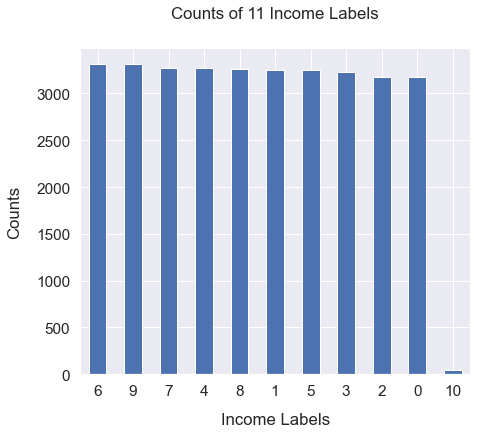

In [30]:
sns.set(font_scale=1.4)
y.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Income Labels", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Counts of 11 Income Labels\n", y=1.02);

-----

### Feature Engineering

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [33]:
X.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'spend.groc', 'spend.med', 'spend.trav', 'asset', 'balance',
       'native.country'],
      dtype='object')

In [61]:
from sklearn.preprocessing import LabelEncoder

categorical = ['workclass','occupation', 'marital.status','relationship','sex', 'native.country' ]  
for feature in categorical:
        le = LabelEncoder()  
        x_train[feature] =le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature]) 

In [35]:
x_train[categorical].head()

,workclass,occupation,marital.status,relationship,sex,native.country
32098,7,4,2,5,0,39
25206,2,7,2,0,1,39
23491,4,4,4,1,0,39
12367,2,5,4,3,1,39
7054,1,4,2,0,1,39


-----

### Implementing multi-classification using Light GBM

In [37]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier() 
lgbm.fit(x_train, y_train)

foo


In [39]:
"""
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
d_val = lgb.Dataset(x_test, label=y_test)

params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass' ###customize
params['metric'] = 'multi_logloss' ###customize
params['num_class'] = y_train.nunique() ###customize
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
"""

"\nimport lightgbm as lgb\nd_train = lgb.Dataset(x_train, label=y_train)\nd_val = lgb.Dataset(x_test, label=y_test)\n\nparams = {}\nparams['learning_rate'] = 0.05\nparams['boosting_type'] = 'gbdt'\nparams['objective'] = 'multiclass' ###customize\nparams['metric'] = 'multi_logloss' ###customize\nparams['num_class'] = y_train.nunique() ###customize\nparams['num_leaves'] = 10\nparams['min_data'] = 50\nparams['max_depth'] = 10\n"

------

### Check the Light GBM multi-classification results: Accuracy, Confusion Matrix, Heatmap

In [40]:
## Finding Accuracy
y_pred1 = lgbm.predict(x_test)   

lgbm_score = accuracy_score(y_test, y_pred1)  
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))

LGBM Model accuracy score : 0.8151


In [ ]:
pd.DataFrame(y_test).head(10)

In [ ]:
pd.DataFrame(y_pred1).head(10)

In [41]:
## check out Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)  
print('LGBM Confusion Matrix for 11-class Labels\n')
print(cm1)


LGBM Confusion Matrix for 11-class Labels

[[917  46   5   8   1   0   4   6   0   1   0]
 [ 36 862  50  11   7   1   1   1   0   0   0]
 [ 18  36 810  45  10   1   3   3   0   4   0]
 [ 13   7  66 847  60  11   5   4   3   3   0]
 [  8  10  11  65 773  64  20   6   7   5   0]
 [  8   6  17  15  81 755  88  18   9   5   0]
 [  8   8   9   8  12  83 714  79  13  17   0]
 [ 11   6  12   3  10   9  80 736  93  22   0]
 [  7   7   8   7   9  12   8 106 737  77   0]
 [  7   6   6  10  14   8   9  28  67 812   2]
 [  0   0   0   0   0   0   0   0   0  12   0]]


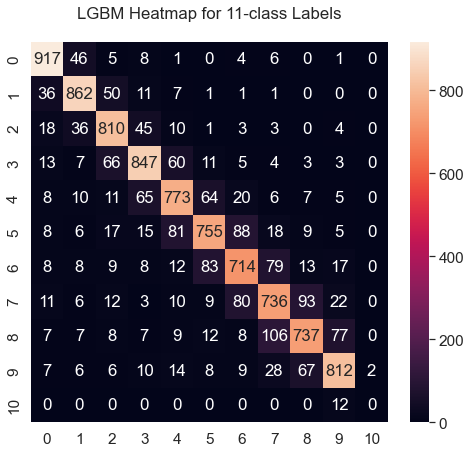

In [44]:
## Visualize with heatmaps
plt.figure(figsize=[8,7])
sns.heatmap(cm1, annot=True, fmt = '.0f')
plt.title('LGBM Heatmap for 11-class Labels\n')
plt.show()

In [47]:
print('LGBM Model accuracy score : {0:0.4f}'.format(lgbm_score))
print('\n')
print(classification_report(y_test, y_pred1))

LGBM Model accuracy score : 0.8151


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       988
           1       0.87      0.89      0.88       969
           2       0.81      0.87      0.84       930
           3       0.83      0.83      0.83      1019
           4       0.79      0.80      0.79       969
           5       0.80      0.75      0.78      1002
           6       0.77      0.75      0.76       951
           7       0.75      0.75      0.75       982
           8       0.79      0.75      0.77       978
           9       0.85      0.84      0.84       969
          10       0.00      0.00      0.00        12

    accuracy                           0.82      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



--------------

## Evaluation and improvement of multi-classification models

### Improving the model by converting it to an appropriate number of classes

In [52]:
## 인접 정확도의 계산
precise_accuracy =  np.sum(y_pred==y_test) / len(y_pred)
adjacent_accuracy =  np.sum(np.abs(y_pred - y_test) <= 1) / len(y_pred)

print('precise accuracy: {0:0.4f}'. format(precise_accuracy))
print('adjacent accuracy: {0:0.4f}'. format(adjacent_accuracy))

precise accuracy: 0.7659
adjacent accuracy: 0.9335


In [63]:
def value_change(x):
    if x <= 20000: return 0
    if x >  20000 and x <= 50000 : return 1
    if x >  50000 and x <= 70000 : return 2
    if x >  70000 and x <= 90000 : return 3 
    return 4
                                       ## Define new function
y = data['income.num'].apply(lambda x: value_change(x))      ## Apply Lambda function

In [64]:
y.value_counts()

1    9686
2    6564
3    6533
0    6426
4    3352
Name: income.num, dtype: int64

In [65]:
y.value_counts().sum()

32561

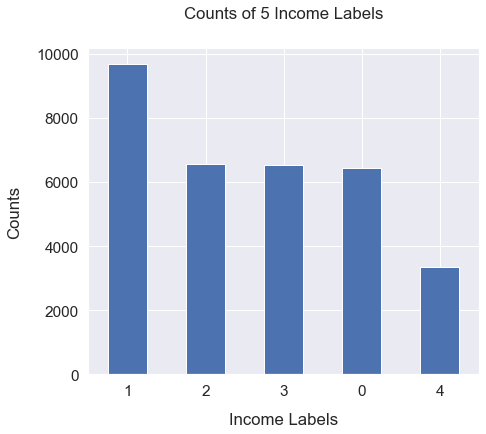

In [66]:
sns.set(font_scale=1.4)
y.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Income Labels", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Counts of 5 Income Labels\n", y=1.02);

-----

### Feature Engineering

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
from sklearn.preprocessing import LabelEncoder

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country']
for feature in categorical:
        le = LabelEncoder()
        x_train[feature] = le.fit_transform(x_train[feature])
        x_test[feature] = le.transform(x_test[feature])

-----

### Checking the improvement result of the Random Forest multi-classification model using the changed class

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [71]:
## Check out the Confusion Matrix
y_pred = rfc.predict(x_test)   
cm3 = confusion_matrix(y_test, y_pred)  
print('Random Forest Confusion Matrix for 5-class Labels\n')
print(cm3)

Random Forest Confusion Matrix for 5-class Labels

[[1811  144    2    0    0]
 [ 105 2721   84    8    0]
 [  31  194 1609  118    1]
 [  26   81  134 1680   39]
 [  13   56   29  253  630]]


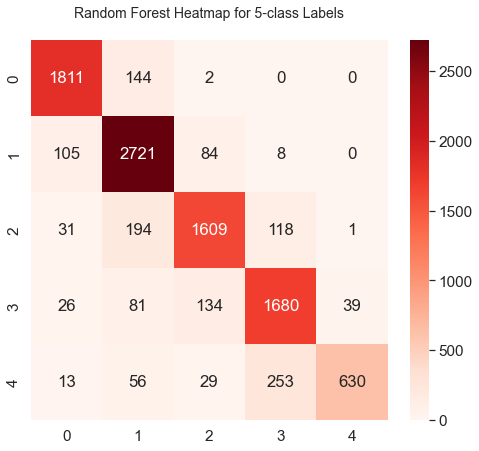

In [73]:
# Draw a Heatmap

plt.figure(figsize=[8,7])
sns.heatmap(cm3, cmap="Reds", annot=True, fmt='.0f')
plt.title('Random Forest Heatmap for 5-class Labels\n', fontsize=14)
plt.show()

In [74]:
## Accruacy Evaluation
precise_accuracy =  np.sum(y_pred==y_test) / len(y_pred) # exact_match
adjacent_accuracy =  np.sum(np.abs(y_pred - y_test) <=1) / len(y_pred)

print('precise accuracy: {0:0.4f}'. format(precise_accuracy))
print('adjacent accuracy: {0:0.4f}'. format(adjacent_accuracy))

precise accuracy: 0.8651
adjacent accuracy: 0.9747


In [75]:
## Comparison of two Accruacy scores
print('Random Forest precise  accuracy for 5 labels: {0:0.4f}'. format(precise_accuracy))
print('Random Forest adjacent accuracy for 5 labels: {0:0.4f}'. format(adjacent_accuracy))
print('\n')
print(classification_report(y_test, y_pred))

Random Forest precise  accuracy for 5 labels: 0.8651
Random Forest adjacent accuracy for 5 labels: 0.9747


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1957
           1       0.85      0.93      0.89      2918
           2       0.87      0.82      0.84      1953
           3       0.82      0.86      0.84      1960
           4       0.94      0.64      0.76       981

    accuracy                           0.87      9769
   macro avg       0.88      0.84      0.85      9769
weighted avg       0.87      0.87      0.86      9769



------

### Checking the improvement results of the Ligth GBM multi-classification model using the changed class

In [77]:
lgbm = LGBMClassifier(random_state=0)  
lgbm.fit(x_train, y_train)
y_pred1 = lgbm.predict(x_test) 

lgbm_score1 = accuracy_score(y_test, y_pred1)
print('LGBM Model accuracy score : {0:0.4f}'.format( lgbm_score1 ))

LGBM Model accuracy score : 0.9030


In [78]:
## Confusion Matrix 

cm4 = confusion_matrix(y_test, y_pred1)   
print('LGBM Confusion Matrix for 5-class Labels\n')
print(cm4)

LGBM Confusion Matrix for 5-class Labels

[[1858   93    2    4    0]
 [  75 2756   70   13    4]
 [  26  129 1700   95    3]
 [  24   54  106 1717   59]
 [  13   35   24  119  790]]


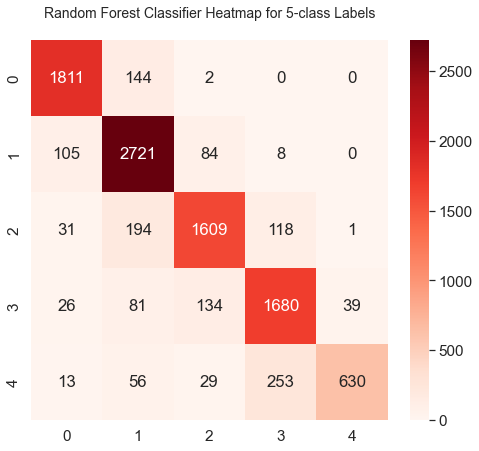

In [79]:
# heatmap using seaborn

plt.figure(figsize=[8, 7])
sns.heatmap(cm3, cmap='Reds', annot=True, fmt='.0f')
plt.title('Random Forest Classifier Heatmap for 5-class Labels\n', fontsize=14)
plt.show()

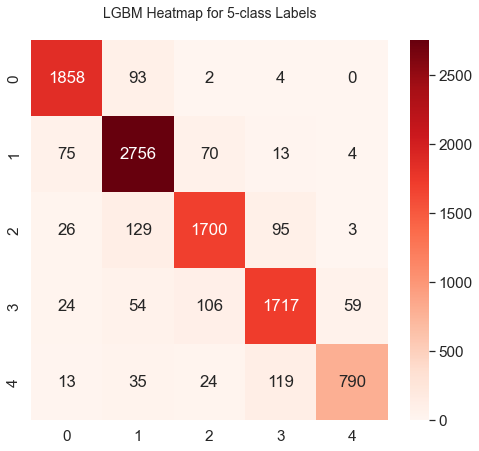

In [80]:
# heatmap using seaborn

plt.figure(figsize=[8, 7])
sns.heatmap(cm4, cmap='Reds', annot=True, fmt='.0f')
plt.title('LGBM Heatmap for 5-class Labels\n', fontsize=14)
plt.show()

In [81]:
## Accuracy Evalaution
precise_accuracy1 =  np.sum(y_pred1 == y_test) / len(y_pred1) # exact_match
adjacent_accuracy1 =  np.sum(np.abs(y_pred1 - y_test) <= 1) / len(y_pred1)   

print('LGBM precise  accuracy for 5 labels: {0:0.4f}'. format(precise_accuracy1))
print('LGBM adjacent accuracy for 5 labels: {0:0.4f}'. format(adjacent_accuracy1))
print('\n')
print(classification_report(y_test, y_pred1))

LGBM precise  accuracy for 5 labels: 0.9030
LGBM adjacent accuracy for 5 labels: 0.9793


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1957
           1       0.90      0.94      0.92      2918
           2       0.89      0.87      0.88      1953
           3       0.88      0.88      0.88      1960
           4       0.92      0.81      0.86       981

    accuracy                           0.90      9769
   macro avg       0.91      0.89      0.90      9769
weighted avg       0.90      0.90      0.90      9769



-----------

### Comparing the results of the income multi-class prediction model

In [82]:
print ('Accuracy Comparisons for Multiclass Models\n')
print ('rfc_score  (11 labels)  :', '{0:0.5f}'.format(rfc_score)) 
print ('rfc_score  ( 5 labels)  :', '{0:0.5f}'.format(precise_accuracy)) 
print ('lbgm_score (11 labels)  :', '{0:0.5f}'.format(lgbm_score)) 
print ('lgbm_score ( 5 labels)  :', '{0:0.5f}'.format(precise_accuracy1)) 

Accuracy Comparisons for Multiclass Models

rfc_score  (11 labels)  : 0.76589
rfc_score  ( 5 labels)  : 0.86508
lbgm_score (11 labels)  : 0.81513
lgbm_score ( 5 labels)  : 0.90296


In [84]:
print ('Classification Comparions for Multiclass Models\n')
print ('rfc_score   :', '{0:0.4f}'.format(rfc_score))
print (classification_report(y_test, y_pred)) 
print ('lgbm_score  :', '{0:0.4f}'.format(lgbm_score))
print (classification_report(y_test, y_pred1))

Classification Comparions for Multiclass Models

rfc_score   : 0.7659
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1957
           1       0.85      0.93      0.89      2918
           2       0.87      0.82      0.84      1953
           3       0.82      0.86      0.84      1960
           4       0.94      0.64      0.76       981

    accuracy                           0.87      9769
   macro avg       0.88      0.84      0.85      9769
weighted avg       0.87      0.87      0.86      9769

lgbm_score  : 0.8151
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1957
           1       0.90      0.94      0.92      2918
           2       0.89      0.87      0.88      1953
           3       0.88      0.88      0.88      1960
           4       0.92      0.81      0.86       981

    accuracy                           0.90      9769
   macro avg       0.91      0.89      0

----------

## conclusion

- 1) Understanding binary and multi-classification models <p>: A modeling method that varies depending on the number of classification items (parameter processing)

- 2) Understanding of linear and tree-based classification models <p>: Logistic Regression, Random Forest, Gradient Boosting, <strong>Light GBM</strong>, etc.


- 3) Understanding how to process variables<p>: Categorical variable handling, scaling, 3 or more classes


- 4) Learning how to interpret classification model results <p>: simple accuracy, <b>proximity accuracy</b>, Precision, Recall, etc.


- 5) Learn how to improve the model based on the evaluation results<p>: Comprehensively use the F1 score, Confusion Matrix, Classification Report, etc.